In [4]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [5]:
def load_fashion_data():
    """Load and preprocess the Fashion MNIST dataset."""
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    y_train = to_categorical(y_train, 10)
    y_test = to_categorical(y_test, 10)
    return x_train, y_train, x_test, y_test

In [6]:
def build_cnn(input_shape=(28, 28, 1), num_classes=10):
    """Build and compile a 6-layer CNN model using Keras Sequential API."""
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [7]:
def train(model, x_train, y_train, epochs=10, batch_size=64):
    """Train the CNN model with training data."""
    model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

In [8]:
def predict_and_plot(model, x_test, y_test, class_names, num_images=2):
    """Predict and display the results for a few test images."""
    predictions = model.predict(x_test[:num_images])
    for i in range(num_images):
        predicted = np.argmax(predictions[i])
        actual = np.argmax(y_test[i])
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {class_names[predicted]} | Actual: {class_names[actual]}")
        plt.axis('off')
        plt.show()
        print(f"Image {i+1}: Predicted - {class_names[predicted]}, Actual - {class_names[actual]}")

In [9]:
def save_predictions_csv(model, x_test, y_test, class_names, filename="predictions.csv"):
    predictions = model.predict(x_test[:100])
    pred_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(y_test[:100], axis=1)
    df = pd.DataFrame({
        'Actual': [class_names[i] for i in true_labels],
        'Predicted': [class_names[i] for i in pred_labels]
    })
    df.to_csv(filename, index=False)
    print(f"Saved predictions to {filename}")


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 49s 55ms/step - accuracy: 0.6334 - loss: 1.0041 - val_accuracy: 0.8447 - val_loss: 0.4181
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 55ms/step - accuracy: 0.8318 - loss: 0.4797 - val_accuracy: 0.8708 - val_loss: 0.3403
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 53ms/step - accuracy: 0.8618 - loss: 0.3891 - val_accuracy: 0.8883 - val_loss: 0.3041
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.8785 - loss: 0.3431 - val_accuracy: 0.8878 - val_loss: 0.2992
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 54ms/step - accuracy: 0.8887 - loss: 0.3129 - val_accuracy: 0.8917 - val_loss: 0.2972
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 52ms/step - accuracy: 0.8971 - loss: 0.2870 - val_accuracy: 0.9020 - val_loss: 0.2605
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 52ms/step - accuracy: 0.9032 - loss: 0.2717 - val_accuracy: 0.9060 - val_loss: 0.2605
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.9133 - loss: 0.2480 - 

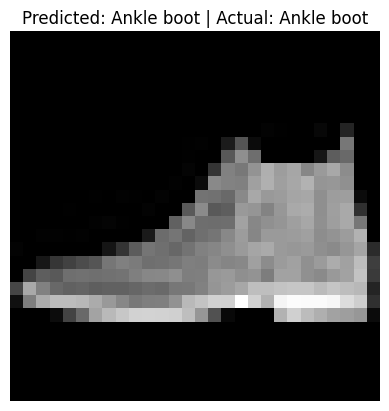

Image 1: Predicted - Ankle boot, Actual - Ankle boot


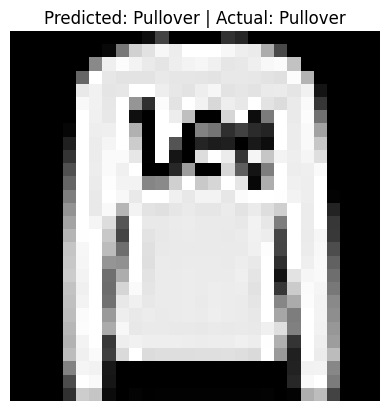

Image 2: Predicted - Pullover, Actual - Pullover
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step 
Saved predictions to predictions.csv


In [10]:
# Run

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

x_train, y_train, x_test, y_test = load_fashion_data()
cnn_model = build_cnn()
train(cnn_model, x_train, y_train)
predict_and_plot(cnn_model, x_test, y_test, class_names)
save_predictions_csv(cnn_model, x_test, y_test, class_names)
